In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [31]:
# Read in list of structures of interest
gcd_list = open('potential_cages_list.txt', 'r').read()
refcodes = gcd_list.split("\n")

In [33]:
indices = []
shapes = {}

# Check the shapes of the structures landscapes
for refcode in refcodes:
    try:
        if os.path.exists('potential_cages/'+refcode+".npy"):
            with open('potential_cages/'+refcode+".npy", 'rb') as f:
                L = np.load(f)
                shapes[refcode] = L.shape
            indices.append(refcode)
    except:
        print("issue with", refcode)

In [34]:
# Create a master array where each row is a landscape. Length is that of L.
length = shapes[refcodes[0]][1]
master = np.empty((1, length)) 

indices = []
for refcode in shapes.keys():
    shape = shapes[refcode]
    # ensure shape has at least 2 elements
    if len(shape) > 1 and shape[1] == length:
        file_path = os.path.join('./potential_cages', refcode + ".npy")
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                L = np.load(f)
                master = np.vstack([master, L])
                indices.append(refcode)
                print(f"Loaded file: {file_path}, Shape: {L.shape}")
        else:
            print(f"Shape mismatch or insufficient length for: {refcode}")

Loaded file: ./potential_cages\VELSAJ.npy, Shape: (1, 500)
Loaded file: ./potential_cages\CACMEB.npy, Shape: (1, 500)
Loaded file: ./potential_cages\VIXCIP.npy, Shape: (1, 500)
Loaded file: ./potential_cages\GUSRIX.npy, Shape: (1, 500)
Loaded file: ./potential_cages\XAMYAM.npy, Shape: (1, 500)
Loaded file: ./potential_cages\HABJEB.npy, Shape: (1, 500)
Loaded file: ./potential_cages\XUKCAJ.npy, Shape: (1, 500)
Loaded file: ./potential_cages\TONHIO.npy, Shape: (1, 500)
Loaded file: ./potential_cages\KALCIK.npy, Shape: (1, 500)
Loaded file: ./potential_cages\MUCQAE.npy, Shape: (1, 500)
Loaded file: ./potential_cages\XUXDOK.npy, Shape: (1, 500)
Loaded file: ./potential_cages\ILUSIU.npy, Shape: (1, 500)
Loaded file: ./potential_cages\UCIJUM.npy, Shape: (1, 500)
Loaded file: ./potential_cages\CAYPAV.npy, Shape: (1, 500)
Loaded file: ./potential_cages\HALKIQ.npy, Shape: (1, 500)
Loaded file: ./potential_cages\VAVTUI.npy, Shape: (1, 500)
Loaded file: ./potential_cages\XUJTIG.npy, Shape: (1, 50

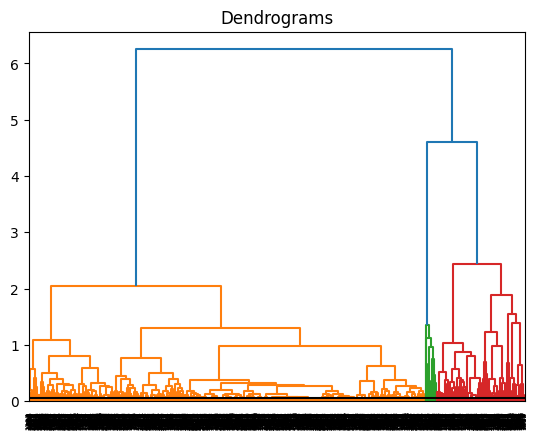

In [35]:
# Remove first row of approx zeros generated by np.empty
master = np.delete(master, 0, 0)

# create list of columns for pandas dataframe
columns = []
for i in range(int(length/2)):
    columns.append("dimension 1 " + str(i))
for i in range(int(length/2)):
    columns.append("dimension 2 " + str(i))

# Convert to pandas dataframe and save
panda_master = pd.DataFrame(data=master, index=indices, columns=columns)
panda_master.to_csv('cages_final.csv')

# Computing dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage
Z = linkage(panda_master, 'ward')

# plot dendrogram
plt.figure()
plt.title("Dendrograms")
dendrogram = dendrogram(Z)
max_d = 0.06 # 
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.savefig('dendogram plot.png')

# See number of clusters k
k=3 
clusters = fcluster(Z, k, criterion='maxclust')

# Then assemble data into a dataframe with refcodes and the corresponding predicted class
labeled = np.array([indices, clusters])
labeled = labeled.T
labeled_pd = pd.DataFrame(data = labeled, columns =['refcode', 'class'])

In [36]:
labeled_pd_1 = labeled_pd[labeled_pd['class'] == '1']
labeled_pd_2 = labeled_pd[labeled_pd['class'] == '2']
labeled_pd_3 = labeled_pd[labeled_pd['class'] == '3']
print(labeled_pd_1.shape)
print(labeled_pd_2.shape)
print(labeled_pd_3.shape)

(1922, 2)
(56, 2)
(424, 2)


In [37]:
potential_cages = labeled_pd[(labeled_pd['class'] == '2') | (labeled_pd['class'] == '3')]

In [38]:
potential_cages

,refcode,class
6,XUKCAJ,3
8,KALCIK,3
13,CAYPAV,3
20,TAZKEM,3
35,KALCEG,3
...,...,...
2385,CUYZON,2
2386,DUCZIM,3
2388,TEXRIZ,3
2392,UNITUI,3


In [43]:
1114 - 340 - 480

294

In [39]:
refcodes = list(labeled_pd_1['refcode'])

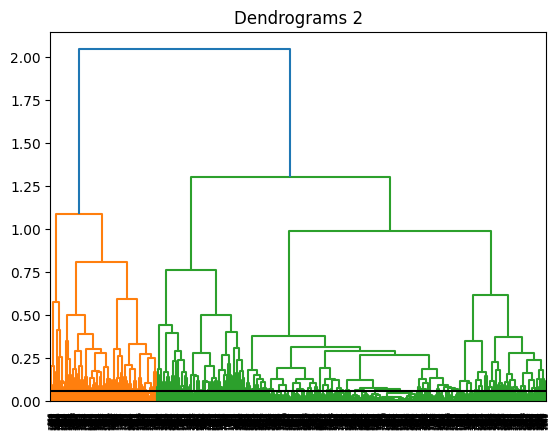

In [40]:
# Create list of indices for pandas dataframe (not using the refcodes list
# in case something wrong happens)
indices = []
shapes = {}

# Check the shapes of the structures landscapes
for refcode in refcodes:
    try:
        if os.path.exists('potential_cages/'+refcode+".npy"):
            with open('potential_cages/'+refcode+".npy", 'rb') as f:
                L = np.load(f)
                shapes[refcode] = L.shape
            indices.append(refcode)
    except:
        print("issue with", refcode)

# Create a master array where each row is a landscape. Length is that of L.
length = shapes[refcodes[0]][1]
master = np.empty((1, length)) 

indices = []
for refcode in shapes.keys():
    shape = shapes[refcode]
    # 确保 shape 至少有两个元素
    if len(shape) > 1 and shape[1] == length:
        file_path = os.path.join('./potential_cages', refcode + ".npy")
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                L = np.load(f)
                master = np.vstack([master, L])
                indices.append(refcode)
        else:
            print(f"Shape mismatch or insufficient length for: {refcode}")

# Remove first row of approx zeros generated by np.empty
master = np.delete(master, 0, 0)

# create list of columns for pandas dataframe
columns = []
for i in range(int(length/2)):
    columns.append("dimension 1 " + str(i))
for i in range(int(length/2)):
    columns.append("dimension 2 " + str(i))

# Convert to pandas dataframe and save
panda_master = pd.DataFrame(data=master, index=indices, columns=columns)
panda_master.to_csv('cages_final.csv')

# Computing dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage
Z = linkage(panda_master, 'ward')

# plot dendrogram
plt.figure()
plt.title("Dendrograms 2")
dendrogram = dendrogram(Z)
max_d = 0.06 # MODIFY THIS ACCORDING TO DENDROGRAM
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.savefig('dendogram plot 2.png')

# See number of clusters k
k=3 
clusters = fcluster(Z, k, criterion='maxclust')

# Then assemble data into a dataframe with refcodes and the corresponding predicted class
labeled = np.array([indices, clusters])
labeled = labeled.T
labeled_pd = pd.DataFrame(data = labeled, columns =['refcode', 'class'])

In [41]:
labeled_pd_1 = labeled_pd[labeled_pd['class'] == '1']
labeled_pd_2 = labeled_pd[labeled_pd['class'] == '2']
labeled_pd_3 = labeled_pd[labeled_pd['class'] == '3']
print(labeled_pd_1.shape)
print(labeled_pd_2.shape)
print(labeled_pd_3.shape)

(413, 2)
(340, 2)
(1169, 2)


In [245]:
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '2'], potential_cages], axis = 0)

In [24]:
refcodes_1 = list(labeled_pd[labeled_pd['class'] == '1'].refcode)
refcodes_3 = list(labeled_pd[labeled_pd['class'] == '3'].refcode)

In [25]:
refcodes = refcodes_1

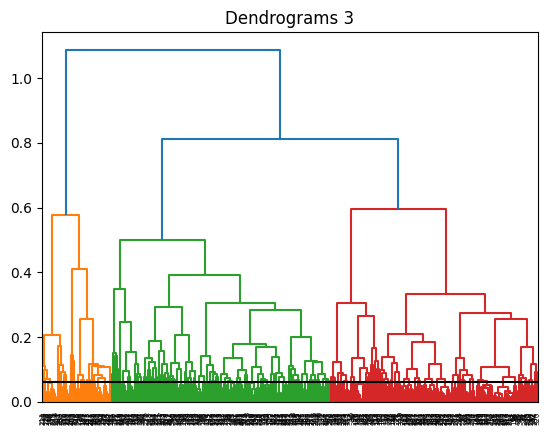

In [26]:
# Create list of indices for pandas dataframe (not using the refcodes list
# in case something wrong happens)
indices = []
shapes = {}

# Check the shapes of the structures landscapes
for refcode in refcodes:
    try:
        if os.path.exists('potential_cages/'+refcode+".npy"):
            with open('potential_cages/'+refcode+".npy", 'rb') as f:
                L = np.load(f)
                shapes[refcode] = L.shape
            indices.append(refcode)
    except:
        print("issue with", refcode)

# Create a master array where each row is a landscape. Length is that of L.
length = shapes[refcodes[0]][1]
master = np.empty((1, length)) 

indices = []
for refcode in shapes.keys():
    shape = shapes[refcode]
    # 确保 shape 至少有两个元素
    if len(shape) > 1 and shape[1] == length:
        file_path = os.path.join('./potential_cages', refcode + ".npy")
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                L = np.load(f)
                master = np.vstack([master, L])
                indices.append(refcode)
        else:
            print(f"Shape mismatch or insufficient length for: {refcode}")

# Remove first row of approx zeros generated by np.empty
master = np.delete(master, 0, 0)

# create list of columns for pandas dataframe
columns = []
for i in range(int(length/2)):
    columns.append("dimension 1 " + str(i))
for i in range(int(length/2)):
    columns.append("dimension 2 " + str(i))

# Convert to pandas dataframe and save
panda_master = pd.DataFrame(data=master, index=indices, columns=columns)
panda_master.to_csv('cages_final.csv')

# Computing dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage
Z = linkage(panda_master, 'ward')

# plot dendrogram
plt.figure()
plt.title("Dendrograms 3")
dendrogram = dendrogram(Z)
max_d = 0.06 
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.savefig('dendogram plot 3.png')

# See number of clusters k
k=48 
clusters = fcluster(Z, k, criterion='maxclust')

# Then assemble data into a dataframe with refcodes and the corresponding predicted class
labeled = np.array([indices, clusters])
labeled = labeled.T
labeled_pd = pd.DataFrame(data = labeled, columns =['refcode', 'class'])

In [249]:
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '1'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '2'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '3'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '4'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '5'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '6'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '7'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '8'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '14'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '21'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '36'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '39'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '41'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '44'], potential_cages], axis = 0)
potential_cages = pd.concat([labeled_pd[labeled_pd['class'] == '48'], potential_cages], axis = 0)

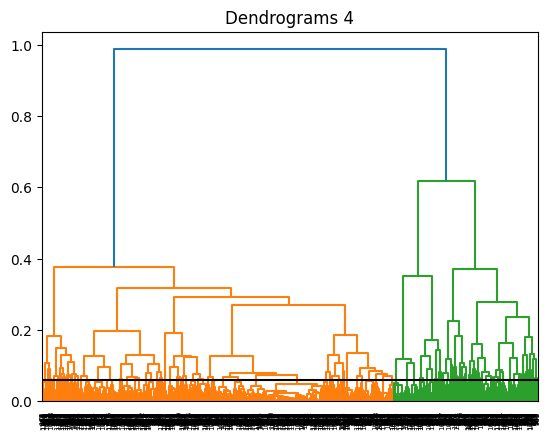

In [29]:
refcodes = refcodes_3
# Create list of indices for pandas dataframe (not using the refcodes list
# in case something wrong happens)
indices = []
shapes = {}

# Check the shapes of the structures landscapes
for refcode in refcodes:
    try:
        if os.path.exists('potential_cages/'+refcode+".npy"):
            with open('potential_cages/'+refcode+".npy", 'rb') as f:
                L = np.load(f)
                shapes[refcode] = L.shape
            indices.append(refcode)
    except:
        print("issue with", refcode)

# Create a master array where each row is a landscape. Length is that of L.
length = shapes[refcodes[0]][1]
master = np.empty((1, length)) 

indices = []
for refcode in shapes.keys():
    shape = shapes[refcode]
    # 确保 shape 至少有两个元素
    if len(shape) > 1 and shape[1] == length:
        file_path = os.path.join('./potential_cages', refcode + ".npy")
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                L = np.load(f)
                master = np.vstack([master, L])
                indices.append(refcode)
        else:
            print(f"Shape mismatch or insufficient length for: {refcode}")

# Remove first row of approx zeros generated by np.empty
master = np.delete(master, 0, 0)

# create list of columns for pandas dataframe
columns = []
for i in range(int(length/2)):
    columns.append("dimension 1 " + str(i))
for i in range(int(length/2)):
    columns.append("dimension 2 " + str(i))

# Convert to pandas dataframe and save
panda_master = pd.DataFrame(data=master, index=indices, columns=columns)
panda_master.to_csv('cages_final.csv')

# Computing dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage
Z = linkage(panda_master, 'ward')

# plot dendrogram
plt.figure()
plt.title("Dendrograms 4")
dendrogram = dendrogram(Z)
max_d = 0.06
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.savefig('dendogram plot 4.png')

# See number of clusters k
k=48
clusters = fcluster(Z, k, criterion='maxclust')

# Then assemble data into a dataframe with refcodes and the corresponding predicted class
labeled = np.array([indices, clusters])
labeled = labeled.T
labeled_pd = pd.DataFrame(data = labeled, columns =['refcode', 'class'])